# Домашнее задание 2
## Гаркавый Андрей, 494 группа

### 2. Применение решающего дерева

In [135]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score
from matplotlib.colors import ListedColormap
import urllib
import numpy as np
import pandas as pd
import pydotplus
from IPython.display import Image
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [47]:
url_numeric = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
raw_data = urllib.request.urlopen(url_numeric)
credit = np.genfromtxt(raw_data)
credit_data = pd.DataFrame(credit[:,:-1])
credit_data.columns = ['Status of existing checking account',
                       'Duration in month',
                       'Credit history',
                       'Credit amount',
                       'Savings account/bonds',
                       'Present employment since',
                       'Personal status and sex',
                       'Present residence since',
                       'Property',
                       'Age in years',
                       'Other installment plans',
                       'Number of existing credits at this bank',
                       'Number of people being liable to provide maintenance for', 
                       'Telephone',
                       'Foreign worker',
                       'Purpose: car (new)',
                       'Purpose: car (used)',
                       'Other debtors/guarantors: none',
                       'Other debtors/guarantors: co-applicant',
                       'Housing: rent',
                       'Housing: own',
                       'Job: unemployed/unskilled - non-resident',
                       'Job: unskilled - resident',
                       'Job: skilled employee/official']
credit_data['target'] = credit[:,-1:]
credit_data.head()

Status of existing checking account  Duration in month  Credit history  \
0                                  1.0                6.0             4.0   
1                                  2.0               48.0             2.0   
2                                  4.0               12.0             4.0   
3                                  1.0               42.0             2.0   
4                                  1.0               24.0             3.0   

   Credit amount  Savings account/bonds  Present employment since  \
0           12.0                    5.0                       5.0   
1           60.0                    1.0                       3.0   
2           21.0                    1.0                       4.0   
3           79.0                    1.0                       4.0   
4           49.0                    1.0                       3.0   

   Personal status and sex  Present residence since  Property  Age in years  \
0                      3.0                      4.0       1.0          67.0   
1                      2.0                      2.0       1.0          22.0   
2                      3.0                      3.0       1.0          49.0   
3                      3.0                      4.0       2.0          45.0   
4                      3.0                      4.0       4.0          53.0   

    ...    Purpose: car (new)  Purpose: car (used)  \
0   ...                   0.0                  0.0   
1   ...                   0.0                  0.0   
2   ...                   0.0                  0.0   
3   ...                   0.0                  0.0   
4   ...                   1.0                  0.0   

   Other debtors/guarantors: none  Other debtors/guarantors: co-applicant  \
0                             1.0                                     0.0   
1                             1.0                                     0.0   
2                             1.0                                     0.0   
3                             0.0                                     0.0   
4                             1.0                                     0.0   

   Housing: rent  Housing: own  Job: unemployed/unskilled - non-resident  \
0            0.0           1.0                                       0.0   
1            0.0           1.0                                       0.0   
2            0.0           1.0                                       0.0   
3            0.0           0.0                                       0.0   
4            0.0           0.0                                       0.0   

   Job: unskilled - resident  Job: skilled employee/official  target  
0                        0.0                             1.0     1.0  
1                        0.0                             1.0     2.0  
2                        1.0                             0.0     1.0  
3                        0.0                             1.0     1.0  
4                        0.0                             1.0     2.0  

[5 rows x 25 columns]

In [48]:
credit_sample = credit_data.sample(n = 13, random_state = 111)

In [49]:
credit_sample

Status of existing checking account  Duration in month  Credit history  \
190                                  4.0               24.0             2.0   
104                                  4.0               12.0             2.0   
295                                  2.0               48.0             2.0   
12                                   2.0               12.0             2.0   
87                                   2.0               36.0             2.0   
523                                  4.0               24.0             2.0   
825                                  1.0               21.0             4.0   
847                                  4.0               24.0             2.0   
194                                  2.0               45.0             2.0   
924                                  1.0               24.0             1.0   
318                                  4.0               12.0             4.0   
751                                  1.0               18.0             2.0   
705                                  4.0               15.0             2.0   

     Credit amount  Savings account/bonds  Present employment since  \
190           46.0                    4.0                       3.0   
104           24.0                    5.0                       2.0   
295          100.0                    1.0                       2.0   
12            16.0                    1.0                       3.0   
87           126.0                    2.0                       3.0   
523           35.0                    2.0                       4.0   
825           16.0                    1.0                       5.0   
847           12.0                    1.0                       2.0   
194           30.0                    2.0                       3.0   
924           69.0                    1.0                       2.0   
318            7.0                    1.0                       3.0   
751           10.0                    1.0                       2.0   
705           53.0                    3.0                       5.0   

     Personal status and sex  Present residence since  Property  Age in years  \
190                      3.0                      3.0       2.0          54.0   
104                      4.0                      4.0       3.0          26.0   
295                      2.0                      2.0       3.0          26.0   
12                       2.0                      1.0       3.0          22.0   
87                       3.0                      4.0       4.0          47.0   
523                      2.0                      4.0       3.0          23.0   
825                      4.0                      3.0       3.0          30.0   
847                      4.0                      2.0       1.0          28.0   
194                      3.0                      4.0       2.0          21.0   
924                      1.0                      1.0       2.0          55.0   
318                      3.0                      2.0       3.0          32.0   
751                      2.0                      2.0       3.0          23.0   
705                      2.0                      4.0       4.0          35.0   

      ...    Purpose: car (new)  Purpose: car (used)  \
190   ...                   0.0                  0.0   
104   ...                   0.0                  1.0   
295   ...                   0.0                  0.0   
12    ...                   0.0                  0.0   
87    ...                   0.0                  0.0   
523   ...                   0.0                  1.0   
825   ...                   1.0                  0.0   
847   ...                   1.0                  0.0   
194   ...                   0.0                  0.0   
924   ...                   0.0                  0.0   
318   ...                   0.0                  0.0   
751   ...                   1.0                  0.0   
705   ...                   1.0         

In [64]:
model = tree.DecisionTreeClassifier()
model.fit(credit_sample.iloc[:, :-1], credit_sample.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [65]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                                filled=True, rounded=True,  
                                feature_names=credit_data.columns,  
                                class_names=['Good', 'Bad'],  
                                special_characters=True)

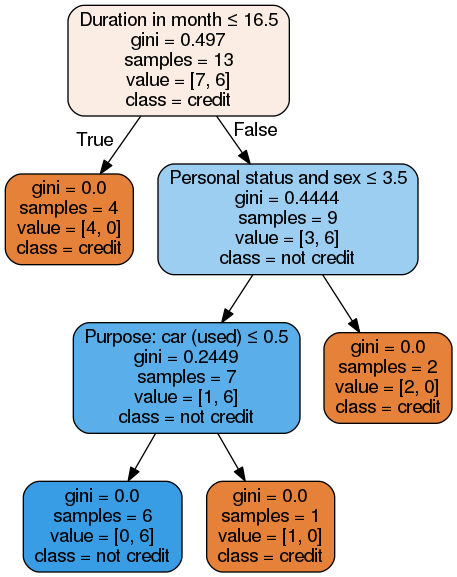

In [67]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())

In [68]:
model.fit(credit_data.iloc[:, :-1], credit_data.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [69]:
dot_data = tree.export_graphviz(model, out_file="big_tree.out", 
                                filled=True, rounded=True,  
                                feature_names=credit_data.columns,  
                                class_names=['Good', 'Bad'],  
                                special_characters=True)

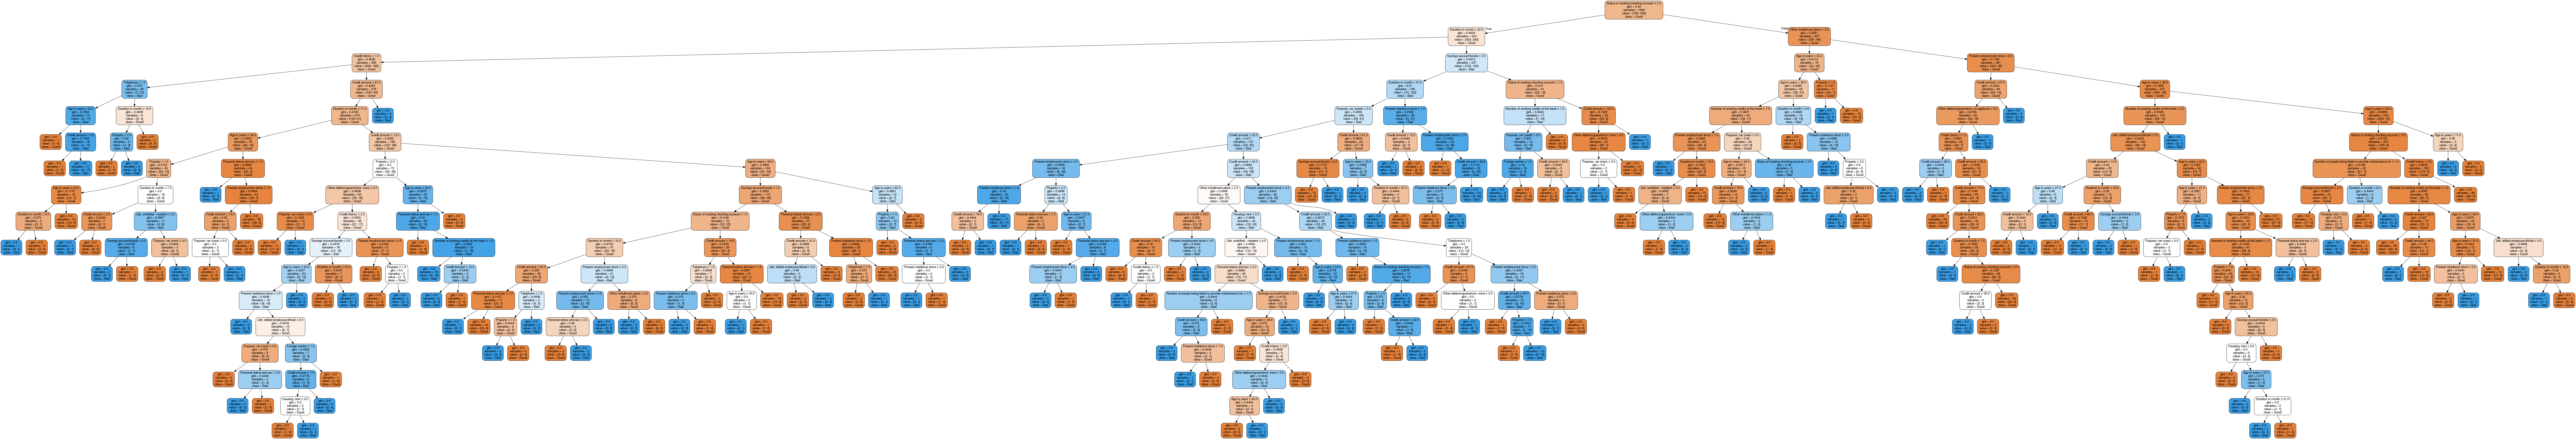

In [70]:
graph = pydotplus.graphviz.graph_from_dot_file("big_tree.out")  
Image(graph.create_png())

Дерево получилось слишком большим, давайте ограничим его глубину

In [74]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(credit_data.iloc[:, :-1], credit_data.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [75]:
dot_data = tree.export_graphviz(model, out_file="medium_tree.out", 
                                filled=True, rounded=True,  
                                feature_names=credit_data.columns,  
                                class_names=['Good', 'Bad'],  
                                special_characters=True)

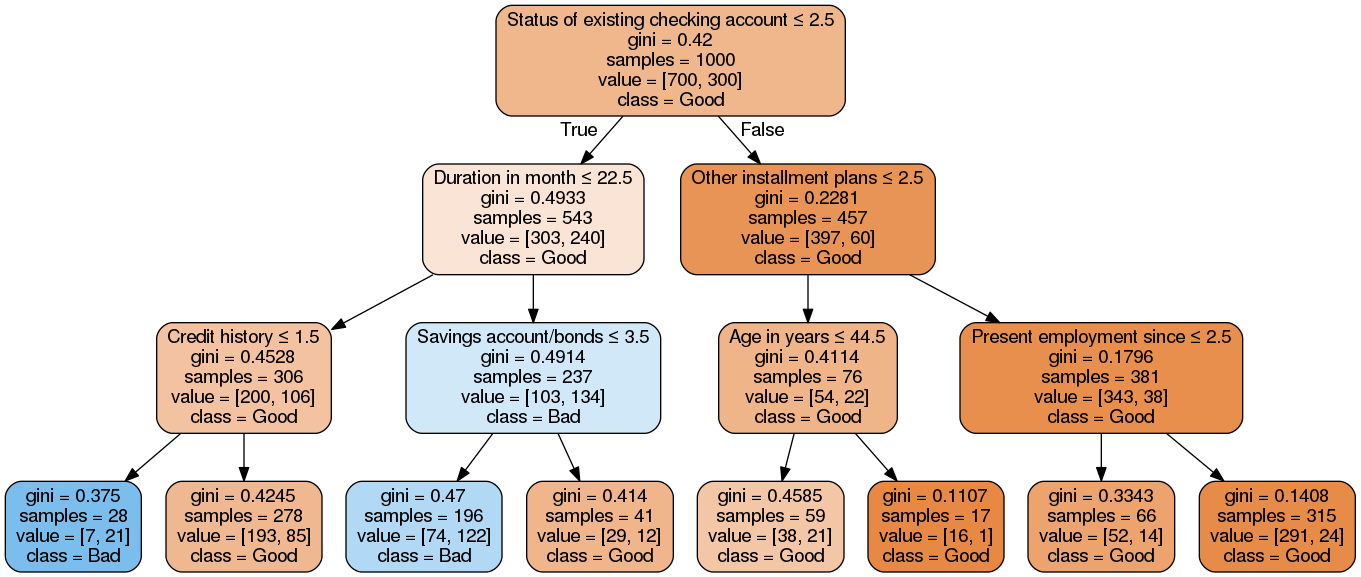

In [76]:
graph = pydotplus.graphviz.graph_from_dot_file("medium_tree.out")  
Image(graph.create_png())

Самый главный критерий - количество денег на счету, если много, то кредит выдается, что разумно.

Если денег мало - смотрим на длительность кредита.

Если кредит краткосрочный, то отдаем предпочтение тем, кто уже брал кредиты.

Если кредит долгосрочный (больше двух лет), то отдаем предпочтение тем, у кого много сбережений.

In [129]:
accuracies = []
for max_depth in range(1, 50):
    model = tree.DecisionTreeClassifier(max_depth=max_depth)
    accuracies.append(np.mean(cross_val_score(model, credit_data.iloc[:, :-1], credit_data.target, cv=5)))

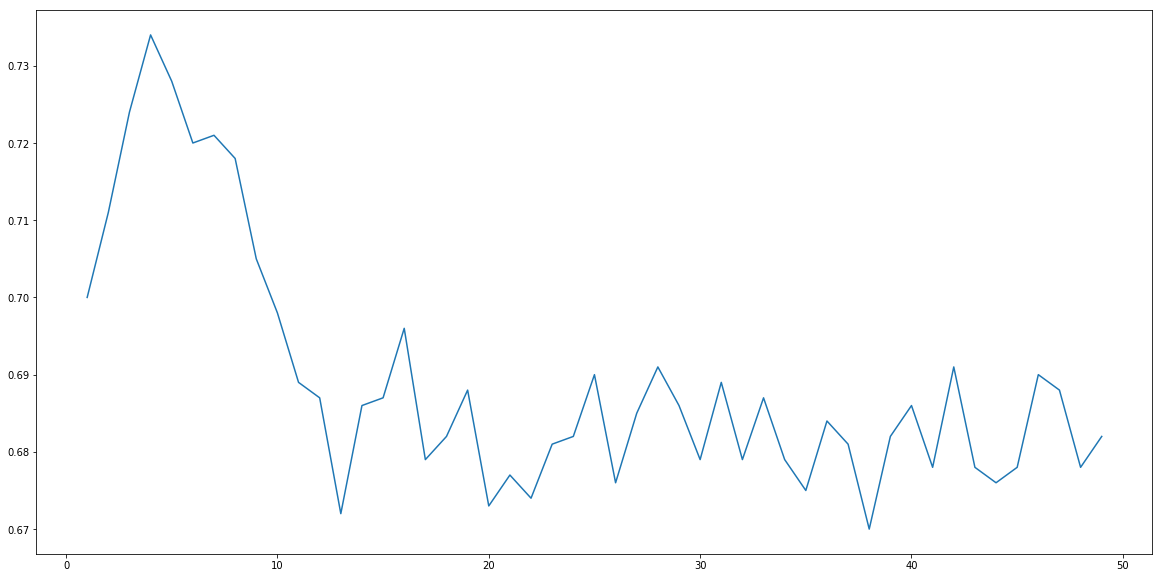

In [130]:
plt.figure(figsize=(20, 10))
plt.plot(arange(1, 50, 1), accuracies)
plt.show()

In [136]:
train_data, test_data, train_target, test_target = train_test_split(credit_data.iloc[:, :-1], 
                                                                    credit_data.target,
                                                                    test_size = 0.2)

In [137]:
accuracies = []
for max_depth in range(1, 50):
    model = tree.DecisionTreeClassifier(max_depth=max_depth)
    model.fit(train_data, train_target)
    accuracies.append(accuracy_score(test_target, model.predict(test_data)))

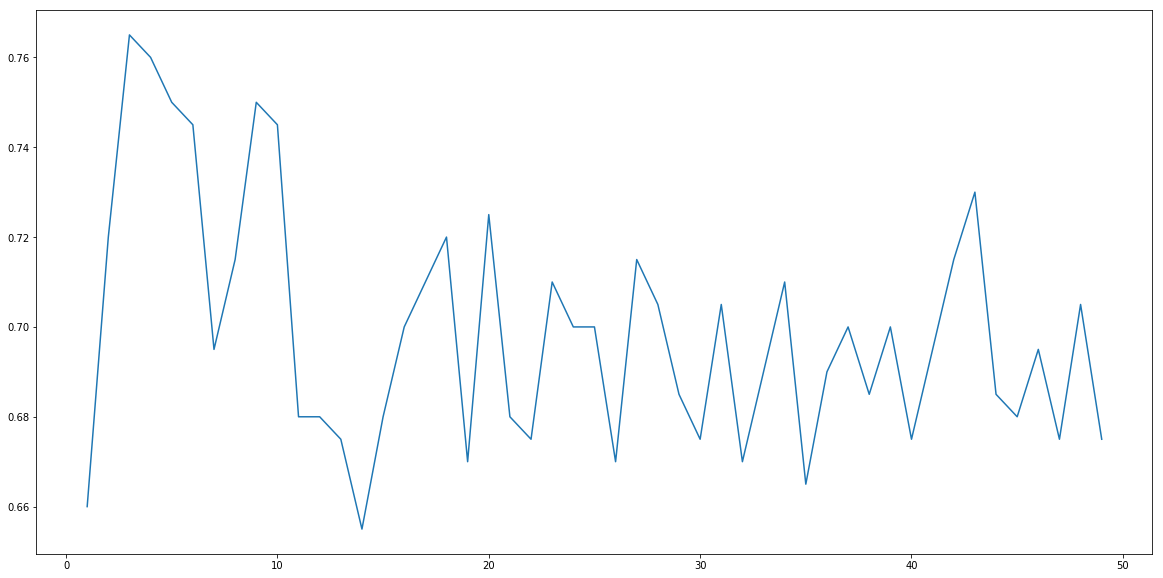

In [138]:
plt.figure(figsize=(20, 10))
plt.plot(arange(1, 50, 1), accuracies)
plt.show()

Как видим, графики зависимости от глубины дерева получились бессмысленными, accuracy колеблется около одного и того же числа, погрешность вычисления слишком велика, видимо. Возможно, датасет не очень большой.